In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels as sm
import seaborn as sns
import re
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def subject_names(Control=6, ChAc=4):
    control = ['Control ' + str(i) for i in np.arange(1, Control + 1, 1, dtype=np.int64)]
    chac = ['ChAc ' + str(i) for i in np.arange(1, ChAc + 1, 1, dtype=np.int64)]
    val = control + chac
    return(val)

def reorder_columns(data):
    df = data.transpose()
    subject_cagegories = subject_names()
    df['subject'] = pd.Categorical(df.index.get_level_values(0), categories=subject_cagegories, ordered=True)
    df['region'] = pd.Categorical(df.index.get_level_values(1), categories=['CN', 'Putamen', 'DLPFC'], ordered=True)
    cols2drop = ['region', 'subject'] if isinstance(df.columns[0], str) else [('region', ), ('subject', )]
    df = df.sort_values([('region'), ('subject')]).drop(cols2drop, axis=1).transpose()
    return(df)

In [3]:
fpath = '../../resources/lipid-data-groups.csv'
group_levels = pd.read_csv(fpath, header=[0, 1], index_col=0).rename_axis(['Dx', 'Region'], axis=1).rename_axis('Group', axis=0)
group_levels = reorder_columns(group_levels)
group_levels

Dx,Control 1,Control 2,Control 3,Control 4,Control 5,Control 6,ChAc 1,ChAc 2,ChAc 3,ChAc 4,...,Control 1,Control 2,Control 3,Control 4,Control 5,Control 6,ChAc 1,ChAc 2,ChAc 3,ChAc 4
Region,CN,CN,CN,CN,CN,CN,CN,CN,CN,CN,...,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC
Group,,,,,,,,,,,,,,,,,,,,,
FC,86.01249,78.49208,86.98186,73.47960,72.05994,70.35621,74.76526,62.75982,85.05140,85.80184,...,77.07698,74.98849,74.30455,83.43361,74.07980,76.29813,77.60351,71.32924,79.20319,66.70411
CE,0.59214,2.51143,0.94935,1.30370,3.70715,1.51144,3.11056,2.71915,1.20094,1.41653,...,0.60729,0.58275,1.33942,0.38238,1.27923,0.89684,2.23171,1.01722,1.17550,2.46848
AC,0.04726,0.08522,0.50852,0.05923,0.17098,0.05078,0.21767,0.24392,0.08813,0.03312,...,0.06404,0.05724,0.42397,0.04146,0.24669,0.07863,0.17994,0.14556,0.08959,0.09821
MG,0.02171,0.03618,0.02604,0.02827,0.03219,0.02505,0.06494,0.08738,0.02797,0.01612,...,0.02331,0.02070,0.02891,0.02556,0.05155,0.02339,0.02192,0.03270,0.03000,0.02808
DG,0.93269,0.64312,0.54213,0.43478,0.60878,0.44212,0.61273,0.68331,0.53963,0.47798,...,0.56272,0.51722,0.38958,0.31929,0.70727,0.38706,0.50084,0.45451,0.43298,0.45474
TG,0.00693,0.00652,0.01647,0.01522,0.03090,0.00921,0.03392,0.16115,0.02647,0.01540,...,0.03317,0.01164,0.04422,0.02154,0.03191,0.04186,0.08358,0.09004,0.03127,0.08527
Cer,0.41626,0.57438,0.42725,0.31078,0.54858,0.32819,0.47781,0.76511,0.37468,0.27243,...,0.40768,0.36218,0.43985,0.29038,0.44591,0.41296,0.49969,0.55809,0.33059,0.41639
dhCer,0.01023,0.01531,0.01231,0.01335,0.01526,0.00823,0.01206,0.01966,0.00906,0.00651,...,0.01018,0.01053,0.01312,0.00876,0.01254,0.01047,0.01268,0.01384,0.00839,0.01003


In [4]:
# import data
fpath = '../../resources/lipid-data-species.csv'
species_levels = pd.read_csv(fpath, header=[0, 1], index_col=0)
# add species group
ix0 = [re.sub('^(\S+)\s.*$', '\\1', s) for s in species_levels.index]
species_levels.index = pd.MultiIndex.from_arrays([ix0, species_levels.index])
# tick locations and labels for heatmap
g, ix = np.unique(ix0, return_index=True)
s = pd.Series(ix, index=g).sort_values() - 0.5
s1 = pd.Series(s.to_list() + [len(species_levels)], index=['start'] + s.index.to_list())
s1 = s1.rolling(window=2).mean().drop('start')
ticks = pd.concat([s.to_frame('tick_loc'), s1.to_frame('label_loc')], axis=1)
group_info = pd.DataFrame({'ticks': ix}, index=g).sort_values('ticks')
# Reorder columns to group Control and ChAc subjects together
c0 = subject_names()
c1 = ['CN', 'Putamen', 'DLPFC']
species_levels = species_levels.reindex(columns=pd.MultiIndex.from_product([c0, c1])).rename_axis(['Dx', 'Region'], axis=1).rename_axis(['Group', 'Species'], axis=0)
species_levels = reorder_columns(species_levels)
species_levels.to_csv('../../resources/lipid-data-species-pretty.csv')

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
def standardize(data):
    val = data.apply(lambda x: (x - x.mean()) / x.std(), axis=1).fillna(0)
    return(val)

def normalize(data):
    val = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1).fillna(0.5)
    return(val)

standardize(species_levels).to_csv('../../resources/lipid-data-species-standardized-pretty.csv')
normalize(species_levels).to_csv('../../resources/lipid-data-species-normalized-pretty.csv')

In [6]:
def make_colors_Region(data, cmap={'DLPFC': 'C0', 'CN': 'C1', 'Putamen': 'gold'}):
    df = data.columns.to_frame()
    val = df.Region.apply(lambda x: cmap[x]).to_list()
    return(val)

def make_colors_Dx(data, cmap={'Control': 'gray', 'ChAc': 'black'}):
    df = data.columns.to_frame()
    val = df.Dx.str.replace(' [0-9]$', '').apply(lambda x: cmap[x]).to_list()
    return(val)

def make_colors_Group(data, min_saturation=0.15):
    t = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name) for name, color in mcolors.CSS4_COLORS.items())
    t = (x for x in t if x[0][1] >= min_saturation)
    colors = list(x[1] for x in t)
    df = data.index.to_frame()
    groups = df.groupby(axis=0, level='Group', sort=False).first().index
    #groups = np.unique(df.Group)
    cmap = pd.Series(colors[:: -np.int16(np.floor(len(colors) / len(groups)))][:len(groups)], index=groups)
    #return(cmap)
    val = df.Group.apply(lambda x: cmap[x]).to_list()
    return((val, cmap))

def my_legend(g, x2color, title='Lipid group', loc='center left', bbox_to_anchor=(-0.3, 0.25, 0.5, 0.5), ncol=1):
    colors = x2color.to_list()
    handles = [mpatches.Patch(color=c) for c in colors]
    labels = x2color.index
    g.legend(handles, labels, title=title, loc=loc, bbox_to_anchor=bbox_to_anchor, ncol=ncol)
    return(g)


<ipython-input-6-6031dff0907e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  val = df.Dx.str.replace(' [0-9]$', '').apply(lambda x: cmap[x]).to_list()


['named-figure/heatmap-std.png', 'named-figure/heatmap-std.pdf']

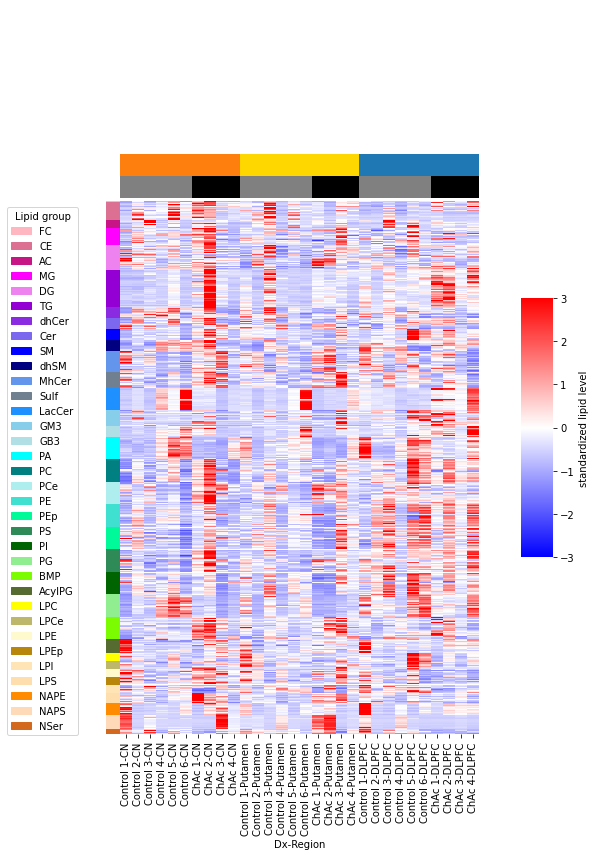

In [7]:
cmap='bwr'
vmin=-3
vmax=3
row_cluster=False
col_cluster=False
data = standardize(reorder_columns(species_levels))
col_colors = [make_colors_Region(data), make_colors_Dx(data)]
row_colors, cmap_group = make_colors_Group(data)
g = sns.clustermap(data, cmap=cmap, vmin=vmin, vmax=vmax, row_cluster=row_cluster, col_cluster=col_cluster, row_colors=row_colors, col_colors=col_colors, cbar_pos=(0.80, 0.35, 0.05, 0.3), figsize=(9, 12))
my_legend(g.fig, cmap_group, title='Lipid group', loc='center left', bbox_to_anchor=(-0.0, 0.2, 0.5, 0.5), ncol=1)
#g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_yticks([])
g.ax_cbar.set_ylabel('standardized lipid level')

attila_utils.savefig(g.fig, 'heatmap-std')

['named-figure/single-panel-heatmap.png',
 'named-figure/single-panel-heatmap.pdf']

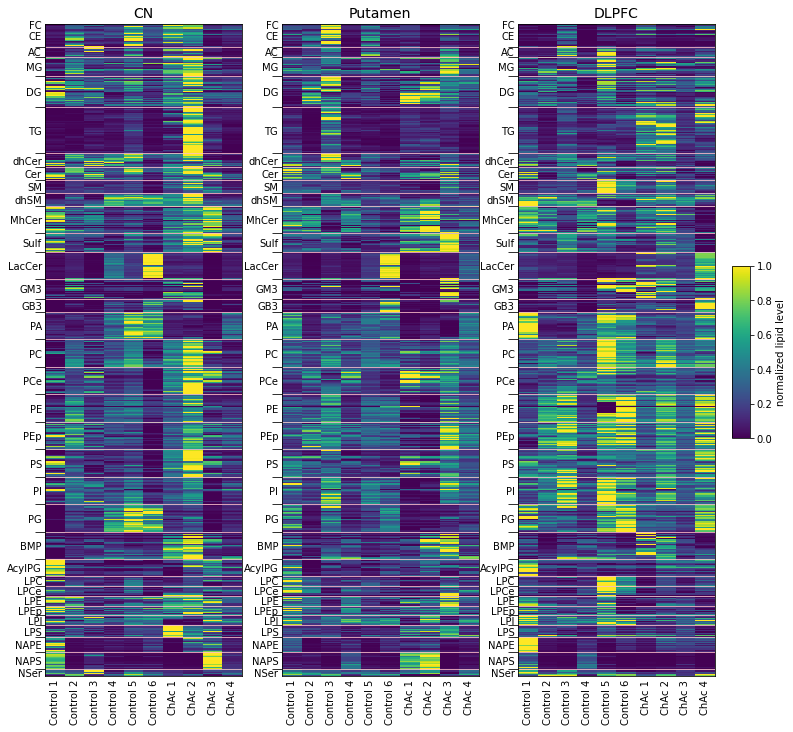

In [8]:
def single_panel_heatmap_ax(ax, region='CN', draw_yticklabels=True, draw_colorbar=False,
                            data=normalize(species_levels), ticks=ticks, cmap='viridis', gridcolor='pink'):
    ax.imshow(data.xs(region, axis=1, level=1), aspect='auto', cmap=cmap, interpolation='none')
    #ax.set_yticks(ticks['tick_loc'])
    ax.set_yticks(ticks.loc['AC':, 'tick_loc'])
    ax.set_yticklabels('')
    ax.set_yticks(ticks['label_loc'], minor=True)
    if draw_yticklabels:
        ax.set_yticklabels(ticks.index, minor=True)
    ax.tick_params(axis='y', which='minor', length=0)
    ax.tick_params(axis='y', which='major', length=10)
    ax.tick_params(axis='x', which='major', length=0)
    ax.set_xticks(range(len(c0)))
    ax.set_xticklabels(data.xs(region, axis=1, level=1).columns, rotation=90)
    ax.grid(True, which='major', axis='y', color=gridcolor)
    ax.set_title(region, fontsize=14)
    if draw_colorbar:
        cm = plt.cm.ScalarMappable(cmap=cmap)
        cm.set_clim(vmin=0, vmax=1)
        cb_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
        fig.colorbar(cm, cax=cb_ax, label='normalized lipid level')
    return((fig, ax))

fig, ax = plt.subplots(1, 3, figsize=(12, 12))
single_panel_heatmap_ax(ax[0], region='CN', draw_yticklabels=True, draw_colorbar=False)
single_panel_heatmap_ax(ax[1], region='Putamen', draw_yticklabels=True, draw_colorbar=False)
single_panel_heatmap_ax(ax[2], region='DLPFC', draw_yticklabels=True, draw_colorbar=True)
attila_utils.savefig(fig, 'single-panel-heatmap')

['named-figure/single-panel-heatmap-CN.png',
 'named-figure/single-panel-heatmap-CN.pdf']

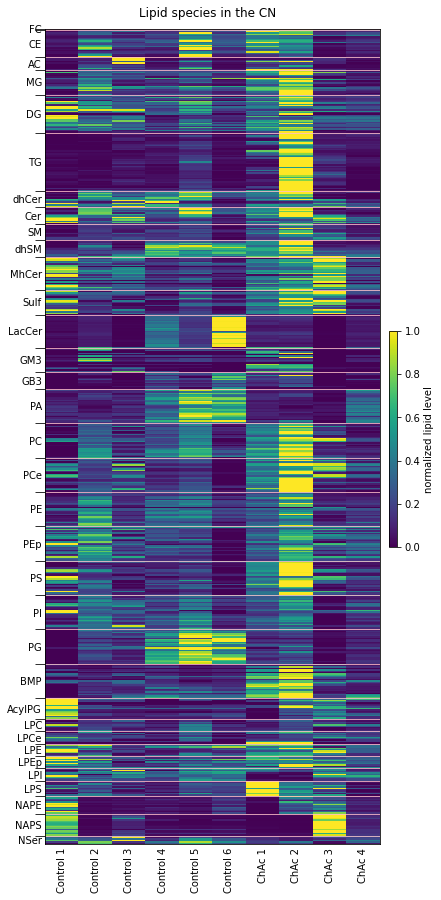

In [9]:
def single_panel_heatmap(region='CN', data=normalize(species_levels), ticks=ticks, cmap='viridis', gridcolor='pink'):
    fig, ax = plt.subplots(figsize=(6, 15))
    ax.imshow(data.xs(region, axis=1, level=1), aspect='auto', cmap=cmap, interpolation='none')
    ax.set_yticks(ticks['tick_loc'])
    ax.set_yticklabels('')
    ax.set_yticks(ticks['label_loc'], minor=True)
    ax.set_yticklabels(ticks.index, minor=True)
    ax.tick_params(axis='y', which='minor', length=0)
    ax.tick_params(axis='y', which='major', length=10)
    ax.tick_params(axis='x', which='major', length=0)
    ax.set_xticks(range(len(c0)))
    ax.set_xticklabels(data.xs(region, axis=1, level=1).columns, rotation=90)
    ax.grid(True, which='major', axis='y', color=gridcolor)
    fig.suptitle('Lipid species in the ' + region, y=0.9)
    cm = plt.cm.ScalarMappable(cmap=cmap)
    cm.set_clim(vmin=0, vmax=1)
    cb_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
    fig.colorbar(cm, cax=cb_ax, label='normalized lipid level')
    return((fig, ax))

fig, ax = single_panel_heatmap()
attila_utils.savefig(fig, 'single-panel-heatmap-CN')

['named-figure/single-panel-heatmap-Putamen.png',
 'named-figure/single-panel-heatmap-Putamen.pdf']

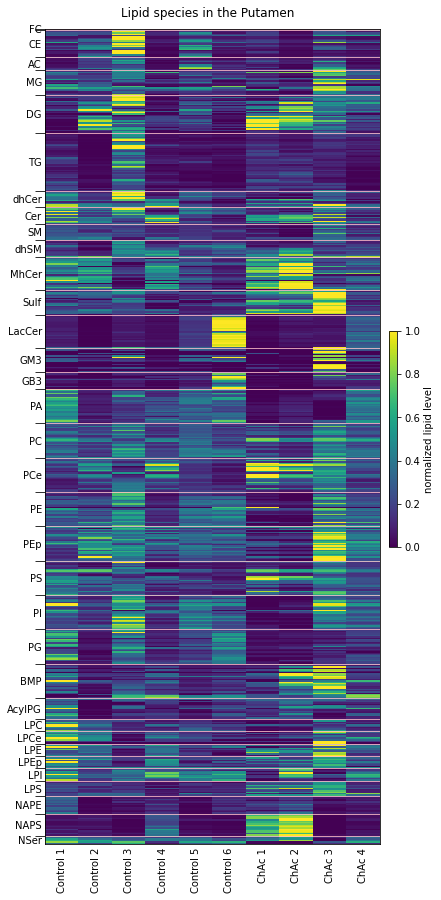

In [10]:
fig, ax = single_panel_heatmap(region='Putamen')
attila_utils.savefig(fig, 'single-panel-heatmap-Putamen')

['named-figure/single-panel-heatmap-DLPFC.png',
 'named-figure/single-panel-heatmap-DLPFC.pdf']

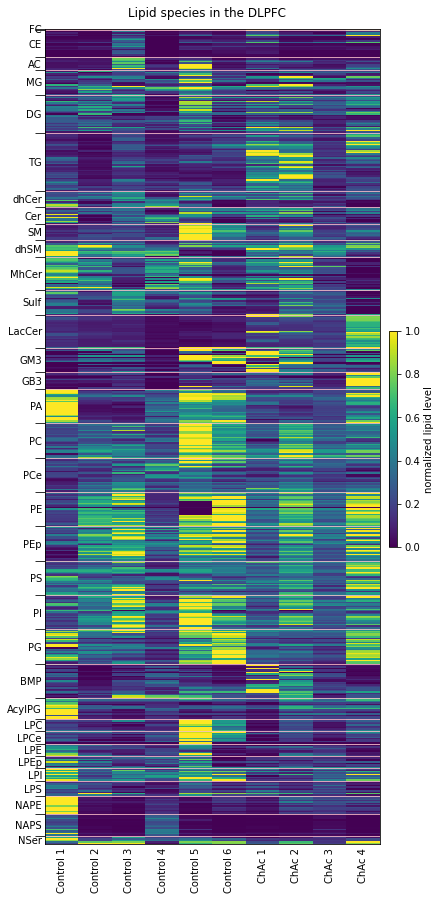

In [11]:
fig, ax = single_panel_heatmap(region='DLPFC')
attila_utils.savefig(fig, 'single-panel-heatmap-DLPFC')

In [12]:
%connect_info

{
  "shell_port": 50793,
  "iopub_port": 50794,
  "stdin_port": 50795,
  "control_port": 50797,
  "hb_port": 50796,
  "ip": "127.0.0.1",
  "key": "1f990d5b-0d388bf5f0752e5619cba605",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-c3035050-3f2f-46f3-b481-2c75a62399bc.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
